# Machine Learning

### FALL-99 A#4
### Bahar Emami Afshar
### STD number: 810197662

In [305]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Phase 0: Visualization and EDA

# 1.


In [101]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 2.
## missing value percent for each attribute is as below:
dataset contains some categorical feature which have a meaningful NaN, and we should not mistaken them with missing values. so we first replace them with another string and then find missing value percentage.

Electrical      0.068493
MasVnrType      0.547945
MasVnrArea      0.547945
GarageYrBlt     5.547945
LotFrontage    17.739726
dtype: float64
None


<AxesSubplot:>

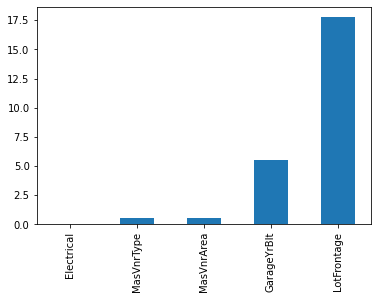

In [212]:
meaning_ful_nan_cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"
                        ,"GarageType","GarageFinish","GarageQual","GarageCond","FireplaceQu","PoolQC"
                       ,"Fence","MiscFeature"]
for col in meaning_ful_nan_cols:
    train_df[col] = train_df[col].fillna("not")


missing_values = train_df.isna().sum()/len(train_df)*100
print(missing_values[missing_values != 0].sort_values())
missing_values[missing_values != 0].sort_values().plot.bar()

# 3.
#### corrolary between two features means they are related to eachother, the more the absoloute corrolary value gets near to 1, the more two features are simillar.
so here's what we're gonna do:
for each two non-target features which have an absoloute corrolary value near to 1, we drop one of the features.
like GarageYrBlt and YearBuilt,GarageCars and GarageArea.

for each feature and target feature, we drop those with absoloute corrolary value near to zero, because they are not realated enough to the target. 
like: BsmtFinSF2,Id,BsmtHalfBath,LowQualFinSF,MiscVal,YrSold.
best features are those who have an absoloute corrolary value near to 1 with target.
#### so best features are:

    1. OverallQual
    2. GrLivArea
    3. 1stFlrSF
    4. TotalBsmtSF
    5. GarageCars
    6. GarageArea
    7. YearBuilt


    

In [103]:
corr = train_df.corr() 
corr.style.background_gradient(cmap ='coolwarm') 




# 4.
a feature which has an exponential relation with target will have a linear relation with log(target). so by transforming target to log(target) we wish to simplify relation of target with feature and find more proper features for our learning. however, in here transforming target to log(target) didn't  make a change in corrolations. 

In [8]:
train_df['SalePrice'] = np.log(train_df['SalePrice'])
corr = train_df.corr() 
corr.style.background_gradient(cmap ='coolwarm') 


# 5.
corrolation by itself is not enough, because it can not calculate the corrolation of categorical variables correctly, so we need more feature engineering.

# 6. 
#### hexbin diagram for each attribute is plotted as below:

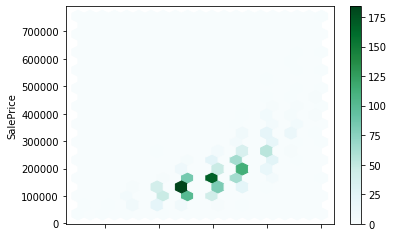

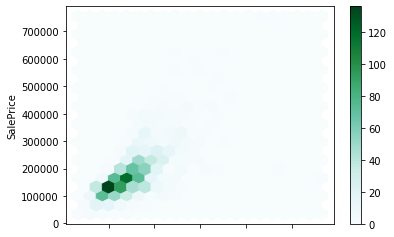

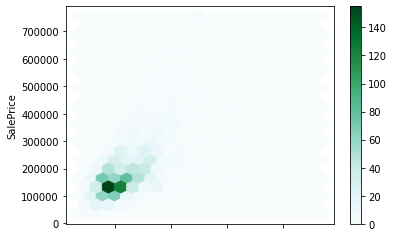

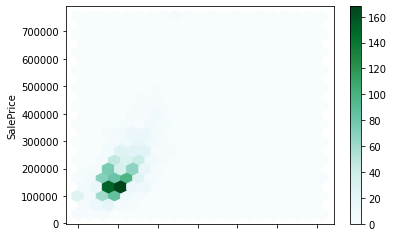

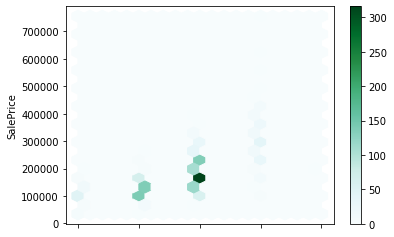

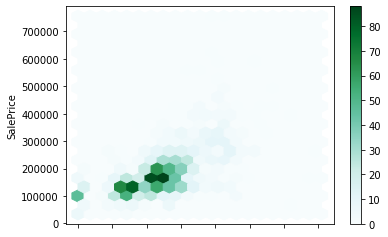

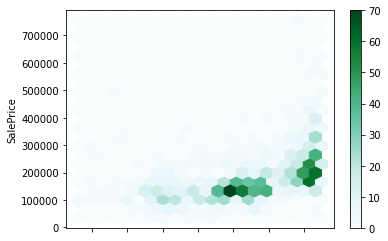

In [77]:
best_cols = ["OverallQual","GrLivArea","1stFlrSF","TotalBsmtSF","GarageCars","GarageArea","YearBuilt"]
for x in best_cols:
    train_df.plot.hexbin(x= x,y="SalePrice", gridsize=20)


#### scatter diagram for each attribute is plotted as below:

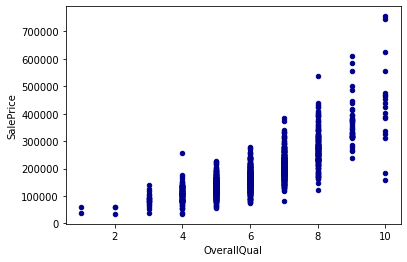

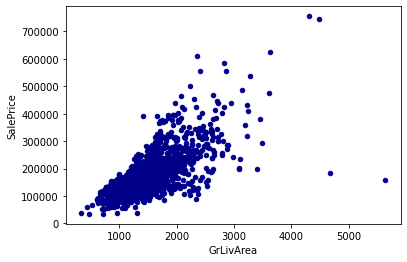

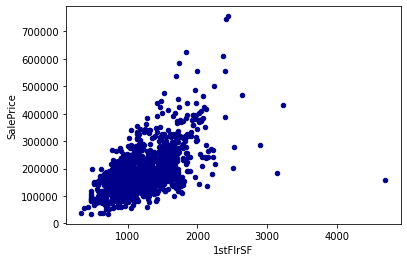

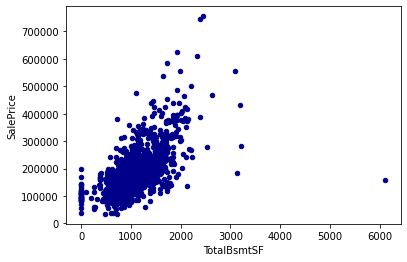

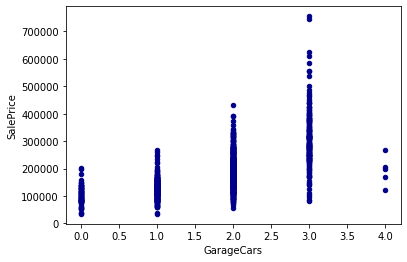

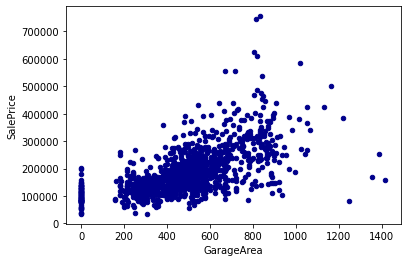

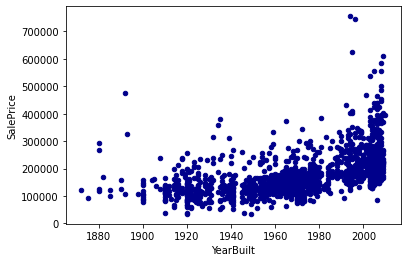

In [80]:
for x in best_cols:
    train_df.plot.scatter(x= x,y="SalePrice", c='DarkBlue')



# 7.

Utilities: Type of utilities available

Neighborhood: Physical locations within Ames city limits

OverallQual: Rates the overall material and finish of the house

FullBath: Full bathrooms above grade


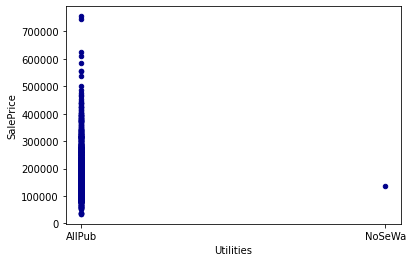

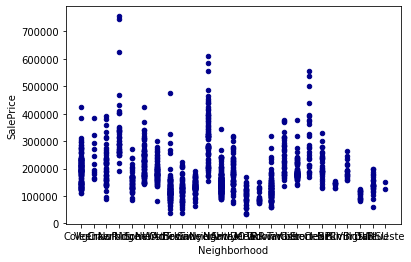

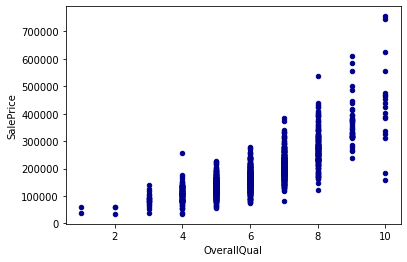

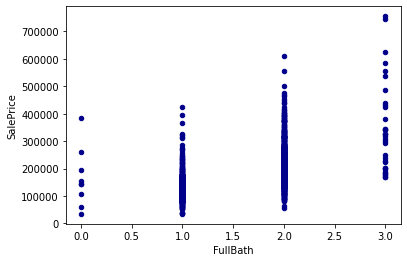

In [259]:
best_cols = ["Utilities","Neighborhood","OverallQual","FullBath"]
for x in best_cols:
    train_df.plot.scatter(x= x,y="SalePrice", c='DarkBlue')

# 8. 
more columns can be ommited based on corrolation map

# Phase 1: Preprocessing

# 1.

1. filling nan values with column mean value can be usefull in small datasets with few attributes, in which we don't want to drop any feature. however,it can cause an error in our prediction as the mean value is not the exact same value for the cell.

2. deleting column which have nan values can be usefull in huge datasets with alot of feautures to train, in which droping a number of cols won't affect the result. but in small datasets which a considerable number of columns contain nan values, deleting them will make our train model so shallow and it won't fit well on data, because it has few number of features to learn.

other methods of dealing with nan values can be, deleting rows which contain nan value. this approch works well on huge datasets in which droping a number of rows won't affect the ratio of train set to test set.

# 2.
feautures that contain missing values are as below:

1. Electrical      0.068493%
2. MasVnrType      0.547945%
3. MasVnrArea      0.547945%
4. GarageYrBlt     5.547945%
5. LotFrontage    17.739726%

we fill the first four and drop the last one.

In [104]:


train_df = train_df.drop(columns=["LotFrontage"])
train_df = train_df.fillna(train_df.mean())


categorical_nan_cols = ["Electrical","MasVnrType"]
print(train_df[categorical_nan_cols].mode())

train_df.loc[:,"Electrical"].fillna("SBrkr",inplace = True)
train_df.loc[:,"MasVnrType"].fillna("None",inplace = True)




  Electrical MasVnrType
0      SBrkr       None


# 3. 
The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

Normalization avoids problems such as combinig multiple features with considerable difference between their range by creating new values that maintain the general distribution and ratios in the source data, while keeping values within a scale applied across all numeric columns used in the model.

Normalization usually means to scale a variable to have a values between 0 and 1, while standardization transforms data to have a mean of zero and a standard deviation of 1.

In [105]:
#normalization part

from sklearn import preprocessing

num_cols = list(train_df._get_numeric_data().columns)
categorical_cols = [x for x in list(train_df.columns) if x not in num_cols]


norm_array = preprocessing.normalize(train_df[num_cols],norm='l2',copy= False)
numerical_df = pd.DataFrame(norm_array,columns = num_cols)
numerical_df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.000005,0.000287,0.040484,0.000034,0.000024,0.009596,0.009596,0.000939,0.003382,0.000000,...,0.000000,0.000292,0.000000,0.0,0.0,0.0,0.000000,0.000010,0.009620,0.998927
1,0.000011,0.000110,0.052801,0.000033,0.000044,0.010868,0.010868,0.000000,0.005379,0.000000,...,0.001639,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000028,0.011039,0.998274
2,0.000013,0.000268,0.050261,0.000031,0.000022,0.008940,0.008944,0.000724,0.002171,0.000000,...,0.000000,0.000188,0.000000,0.0,0.0,0.0,0.000000,0.000040,0.008971,0.998511
3,0.000028,0.000499,0.068019,0.000050,0.000036,0.013639,0.014031,0.000000,0.001538,0.000000,...,0.000000,0.000249,0.001937,0.0,0.0,0.0,0.000000,0.000014,0.014288,0.997140
4,0.000020,0.000240,0.056936,0.000032,0.000020,0.007985,0.007985,0.001397,0.002615,0.000000,...,0.000767,0.000335,0.000000,0.0,0.0,0.0,0.000000,0.000048,0.008017,0.998169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.008308,0.000342,0.045176,0.000034,0.000029,0.011407,0.011412,0.000000,0.000000,0.000000,...,0.000000,0.000228,0.000000,0.0,0.0,0.0,0.000000,0.000046,0.011452,0.998583
1456,0.006922,0.000095,0.062594,0.000029,0.000029,0.009397,0.009445,0.000565,0.003753,0.000774,...,0.001658,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000010,0.009549,0.997696
1457,0.005466,0.000262,0.033901,0.000026,0.000034,0.007277,0.007521,0.000000,0.001031,0.000000,...,0.000000,0.000225,0.000000,0.0,0.0,0.0,0.009373,0.000019,0.007536,0.999183
1458,0.010236,0.000140,0.068172,0.000035,0.000042,0.013681,0.014004,0.000000,0.000344,0.007219,...,0.002568,0.000000,0.000786,0.0,0.0,0.0,0.000000,0.000028,0.014102,0.997118


# 4. categorical features
many machine learning algorithms including ones we have used in this project can't work with categorical features. so we have to encode them into numeric values.
we can eaither drop categorical variables or encod them using appropriate techniques.
droping columns is not always the best choice as the dropped column may have important effect on our prediction and by droping them we will result in a not accurate prediction.

techniques for encoding categorical varables to numerics are:
1. if the order of categorical variable is important we can use Ordinal encoding label ech value with an integer, using a map.
2. if the order is not important and values are not compareble to each other we can use One-Hot or Label-encoding.

since our categorical features are from second type, we use on hot to encode them.

In [106]:
#one hot
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
onehot = encoder.fit_transform(train_df[categorical_cols]).toarray()
encoder_cols = encoder.get_feature_names(categorical_cols)
categorical_df = pd.DataFrame(onehot,columns = encoder_cols)

categorical_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_not,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# 5.
according to the heatmap obtained in question3 of phase 0, droping features which have near zero corrolary with target and droping one of each two features who have near one corrolary seems to be usefull.


In [107]:
train_df = pd.concat([numerical_df, categorical_df], axis=1)
drop_cols = ["BsmtFinSF2","Id","BsmtHalfBath","LowQualFinSF","MiscVal","YrSold"] #zero corrolary with target
drop_cols_2 =["GarageCars","GarageYrBlt"]#near one corrolary with another feature


train_df = train_df.drop(columns=drop_cols+drop_cols_2)
train_df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000287,0.040484,0.000034,0.000024,0.009596,0.009596,0.000939,0.003382,0.000719,0.004101,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000110,0.052801,0.000033,0.000044,0.010868,0.010868,0.000000,0.005379,0.001562,0.006941,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000268,0.050261,0.000031,0.000022,0.008940,0.008944,0.000724,0.002171,0.001939,0.004110,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000499,0.068019,0.000050,0.000036,0.013639,0.014031,0.000000,0.001538,0.003846,0.005385,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000240,0.056936,0.000032,0.000020,0.007985,0.007985,0.001397,0.002615,0.001956,0.004572,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.000342,0.045176,0.000034,0.000029,0.011407,0.011412,0.000000,0.000000,0.005438,0.005438,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.000095,0.062594,0.000029,0.000029,0.009397,0.009445,0.000565,0.003753,0.002798,0.007326,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.000262,0.033901,0.000026,0.000034,0.007277,0.007521,0.000000,0.001031,0.003288,0.004319,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.000140,0.068172,0.000035,0.000042,0.013681,0.014004,0.000000,0.000344,0.000000,0.007563,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# 6.
ratios tested for p where 0.2 and 0.25, which 0.25 predicted better.
we can split data to train and test with order or randomly, which in here spliting with order gets better results.

In [108]:
from sklearn.model_selection import train_test_split
cols = list(train_df.columns)
print(train_df.shape)
X = train_df.iloc[:,:-1]
y = train_df["SalePrice"]

print(X.shape,y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(1460, 295)
(1460, 294) (1460,)


In [217]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

def preprocess(train_df,nan_values="fill",categorical="encode",normalize=True,
               drop_cols=True,test_size=0.2,order_split=False):
    
    y = train_df["SalePrice"]
    df = train_df.drop(columns=["SalePrice"],errors ='ignore')
    meaning_ful_nan_cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"
                        ,"GarageType","GarageFinish","GarageQual","GarageCond","FireplaceQu","PoolQC"
                       ,"Fence","MiscFeature"]
    for col in meaning_ful_nan_cols:
        df[col] = df[col].fillna("not")


    nan_columns = df.isna().any()
    columns_with_nan = df.columns[nan_columns].tolist()
    if nan_values == "drop":
        df = df.drop(columns=["LotFrontage"],errors ='ignore')
        df = df.drop(columns=columns_with_nan,errors ='ignore')

    if nan_values == "fill":
        df = df.fillna(df.mean())
        df.loc[:,"Electrical"].fillna("SBrkr",inplace = True)
        df.loc[:,"MasVnrType"].fillna("None",inplace = True)

    num_cols = list(df._get_numeric_data().columns)
    numerical_df = df[num_cols]
    categorical_cols = [x for x in list(df.columns) if x not in num_cols]
    categorical_df = df[categorical_cols]
    
    if normalize:
        norm_array = preprocessing.normalize(df[num_cols],norm='l2',copy= False)
        numerical_df = pd.DataFrame(norm_array,columns = num_cols)
        
        
    if categorical == "drop":
        categorical_df = categorical_df.drop(columns=categorical_cols,errors ='ignore')
    
    elif categorical == "encode":
        encoder = OneHotEncoder()
        onehot = encoder.fit_transform(df[categorical_cols]).toarray()
        encoder_cols = encoder.get_feature_names(categorical_cols)
        categorical_df = pd.DataFrame(onehot,columns = encoder_cols)
    
    df = pd.concat([numerical_df, categorical_df], axis=1)
    
    if drop_cols:
        drop_cols_1 = ["BsmtFinSF2","Id","BsmtHalfBath","LowQualFinSF","MiscVal","YrSold"] #zero corrolary with target
        drop_cols_2 =["GarageCars","GarageYrBlt"]#near one corrolary with another feature
        df = df.drop(columns=drop_cols_1+drop_cols_2,errors ='ignore')


    
    cols = list(df.columns)
    X = df
    
    if order_split:
        size = int(len(df)*(1-test_size))
        X_train = df.iloc[:size,:]
        y_train = y.iloc[:size]
        X_test = df.iloc[size:,:]
        y_test = y.iloc[size:]
        
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    return X_train, X_test, y_train, y_test

# Phase 2: Model Training, Evaluation and Hyperparameter Tuning

In [218]:
def train_and_test(model,X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    mae = mean_absolute_error(np.array(y_test), y_pred)
    rmse = mean_squared_error(np.array(y_test), y_pred,squared = False)
    return mae,rmse

# KNN

In [257]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


df = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")
X_train, X_test, y_train, y_test = preprocess(df,nan_values="fill",categorical="encode",
                                              normalize=True,drop_cols=True,test_size=0.25,order_split=False)


param_grid_knn = {
    'random_state': [0,42,60],
    'n_neighbors': range(3,50),
    'n_estimators': [20,100, 200, 300, 1000]
}


knn = KNeighborsRegressor()


grid_search = GridSearchCV(estimator = knn, param_grid = param_grid_knn,cv = 3, n_jobs = -1, verbose = 2)
mae,rmse = train_and_test(knn,X_train, X_test, y_train, y_test)

mae,rmse

(24886.239452054797, 40273.974832753476)

# trying different preprocessing methods



In [307]:
df = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")

result = pd.DataFrame(columns=["model","test/train ratio","normalize","categorical values"
                               ,"missing values","split with order","mae","rmse"])

agents = [KNeighborsRegressor(n_neighbors=20),DecisionTreeRegressor(max_depth = 22),LinearRegression()]
nan_values = ["fill","drop"]
categorical_var = ["encode","drop"]
normalize = drop_cols = order_split = [True,False]
test_ratio = [0.2,0.25]
for nan in nan_values:
    for c_var in categorical_var:
        for norm in normalize:
            for order in order_split:
                for ratio in test_ratio:
                    for model in agents:
                        X_train, X_test, y_train, y_test = preprocess(df,nan_values=nan,categorical=c_var,
                                                    normalize=norm,test_size=ratio,order_split = order)
                        mae,rmse = train_and_test(model,X_train, X_test, y_train, y_test)
                        result = result.append({"model":model,"test/train ratio":ratio,"normalize":norm,
                                       "categorical values":c_var,"missing values":nan,
                                       "split with order":order,"mae":mae,"rmse":rmse},
                                         ignore_index=True)
                            


In [309]:

result.sort_values(by = ["mae","rmse"])[:25]

,model,test/train ratio,normalize,categorical values,missing values,split with order,mae,rmse
65,LinearRegression(),0.25,False,encode,drop,True,18465.286889,42589.851719
17,LinearRegression(),0.25,False,encode,fill,True,18518.362472,43657.613851
62,LinearRegression(),0.20,False,encode,drop,True,19787.084468,47630.865184
71,LinearRegression(),0.25,False,encode,drop,False,19946.611846,57927.595424
23,LinearRegression(),0.25,False,encode,fill,False,20001.959938,59384.624853
14,LinearRegression(),0.20,False,encode,fill,True,20046.631757,48688.450646
68,LinearRegression(),0.20,False,encode,drop,False,20872.962689,63146.741631
20,LinearRegression(),0.20,False,encode,fill,False,21038.950624,64566.339715
47,LinearRegression(),0.25,False,drop,fill,False,21927.960145,34956.725474
95,LinearRegression(),0.25,False,drop,drop,False,22090.013212,35420.852782


# Decision Tree

In [250]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = preprocess(df,nan_values="fill",categorical="drop",
                                              normalize=False,drop_cols=True,test_size=0.25,order_split=False)
param_grid = {
    'random_state': [0,42,60],
    'max_depth': range(5,70),
    'n_estimators': [20,100, 200, 300, 1000]
}


clf = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
mae,rmse = train_and_test(clf,X_train, X_test, y_train, y_test)

mae,rmse

(23863.81917808219, 36201.633161752274)

# Linear Regression

In [238]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = preprocess(df,nan_values="drop",categorical="encode",
                                              normalize=False,drop_cols=True,test_size=0.25,order_split=True)
param_grid = {
    'fit_intercept':[True,False],
    'n_jobs': [20,100, 200, 300, 1000]
}


reg = LinearRegression()
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
mae,rmse = train_and_test(reg,X_train, X_test, y_train, y_test)


print("mae: ",mae,"rmse: ",rmse)



mae:  18465.286888669365 rmse:  42589.85171866885


## Overfitting vs Underfitting
A model is underfitting the training data when the model performs poorly on the training data. This is because the model is unable to capture the relationship between the features and the target values.

A model is overfitting the training data when it performs well on the training data but does not perform well on the evaluation data. This is because the model is memorizing the data it has seen and is unable to generalize to unseen examples.

all 3 trained models, perform acceptable on both training data an validation data so the model is not over fitted. by changing training data order the model fits differently so it is not under fitted.


# Phase 3: Ensemble Methods

# Random Forest

In [229]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = preprocess(df,nan_values="fill",categorical="drop",
                                              normalize=False,drop_cols=True,test_size=0.25,order_split=False)
param_grid = {
    'random_state': [0,42,60],
    'max_depth': range(5,70),
    'n_estimators': [20,100, 200, 300, 1000]
}


clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
mae,rmse = train_and_test(clf,X_train, X_test, y_train, y_test)

print("mae: ",mae,"rmse: ",rmse)



mae:  23656.94794520548 rmse:  38069.50634185225


# Voting Regression

In [303]:
from sklearn.ensemble import VotingRegressor

X_train, X_test, y_train, y_test = preprocess(df,nan_values="drop",categorical="encode",
                                              normalize=False,drop_cols=False,test_size=0.25,order_split=True)

param_grid = {
    'weights': [[1,1,1],[5,15,1],[3,15,2],[7,4,10],[5,1,10],[18,13,14]]
}
r1 = KNeighborsRegressor(n_neighbors=22)
r2 = DecisionTreeRegressor(max_depth= 17)
r3 = LinearRegression() 
vreg = VotingRegressor([('KNN', r1), ('DT', r2),('LR',r3)])
grid_search = GridSearchCV(estimator = vreg, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
mae,rmse = train_and_test(vreg,X_train, X_test, y_train, y_test)
print("mae: ",mae,"rmse: ",rmse)

mae:  19284.179796180735 rmse:  34948.659645124324


# 3.
voting regression ensembles number of agents, so if on agents fail in prediction a sample, other agent can cover that. if we use agents who have acceptable results alone in a voting regression, the overall results will get better, but if all those agents fail on a sample voting regression won't do a favor.